In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
raw_data = pd.read_csv('1553768847-housing.csv')
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
raw_data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,NaN,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,NaN,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,NaN,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,NaN,264725.000000


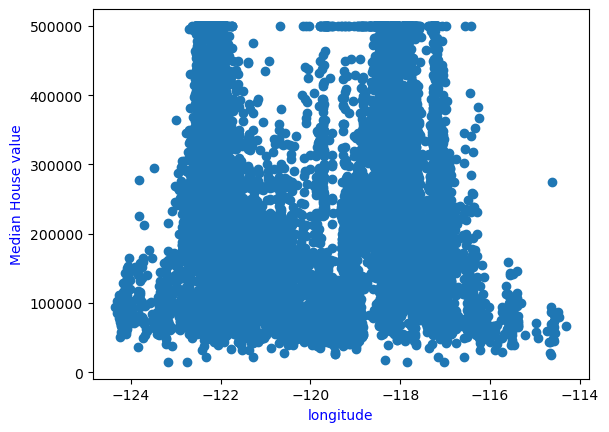

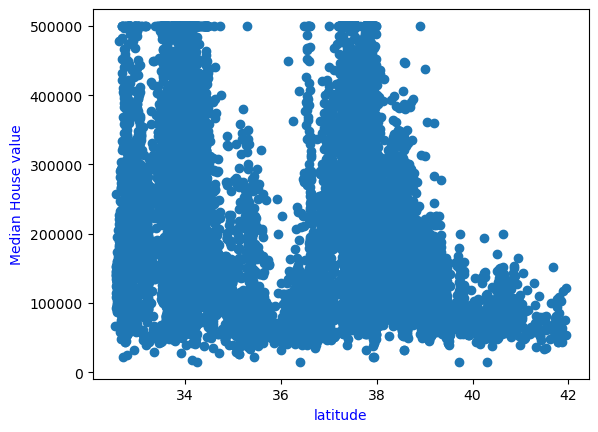

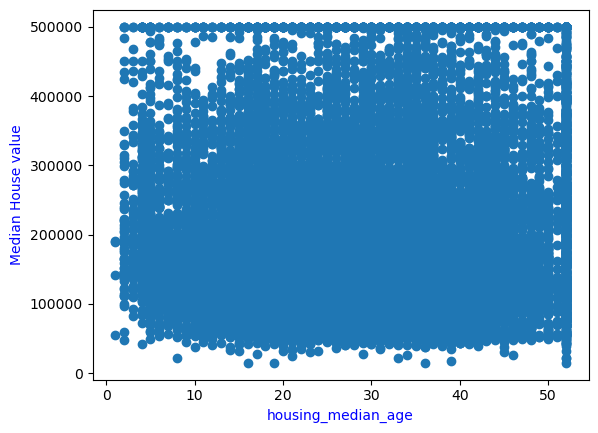

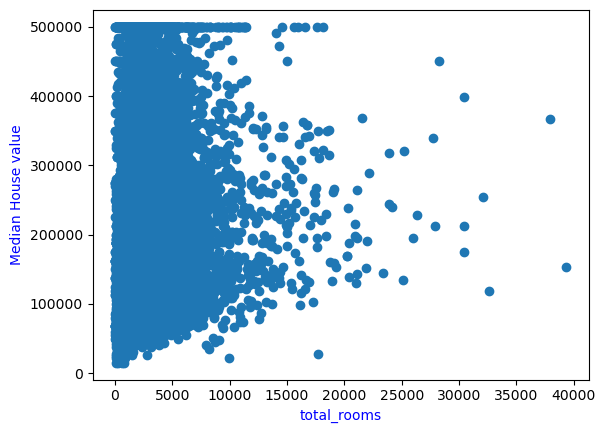

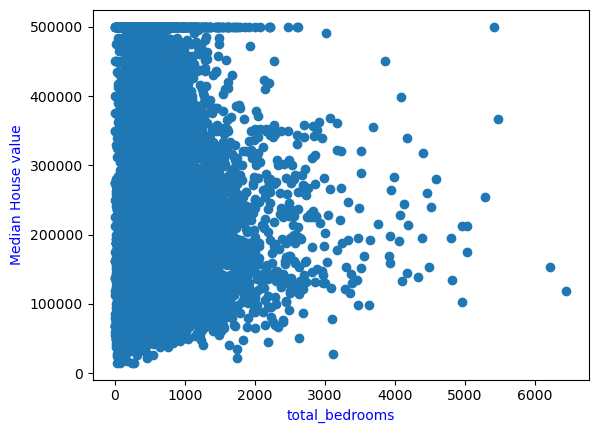

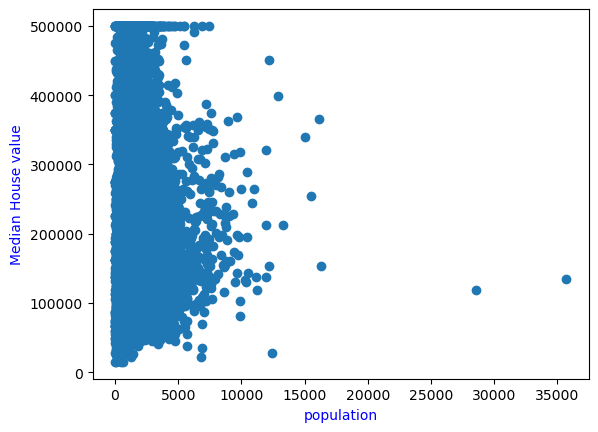

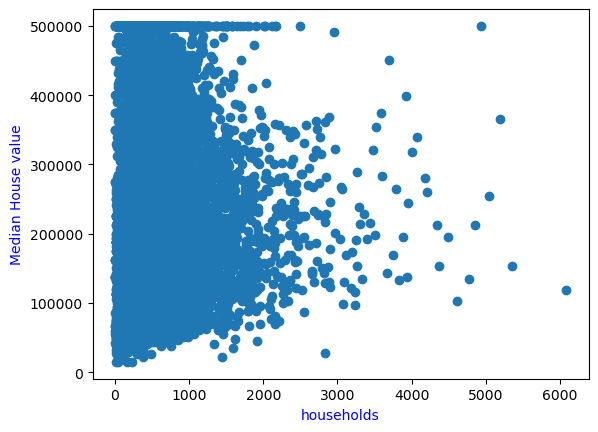

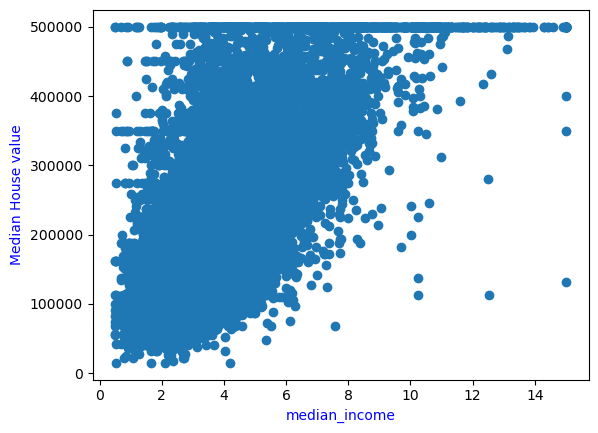

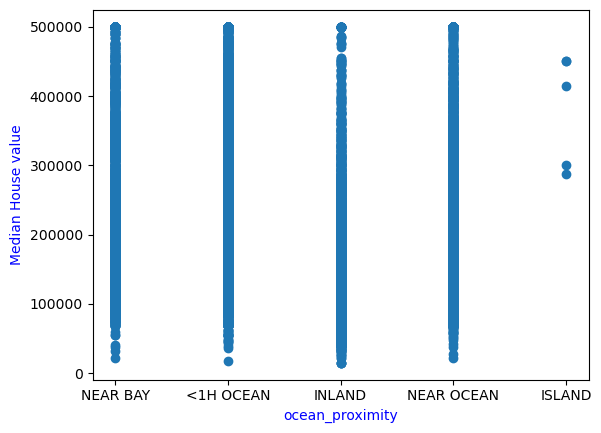

In [4]:
for col in raw_data:
    if col != 'median_house_value':
        plt.scatter(raw_data[col], raw_data['median_house_value'])
        plt.xlabel(col, size=10, color='blue')
        plt.ylabel('Median House value', size=10, color='blue')
        plt.show()


In [5]:
print("Null values are:\n", raw_data.isnull().sum())

Null values are:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [6]:
raw_data['total_bedrooms'].fillna(raw_data['total_bedrooms'].mean(), inplace=True)
raw_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [7]:
def detect_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    return categorical_columns
def encode_categorical_columns(df):
    categorical_columns = detect_categorical_columns(df)
    le = LabelEncoder()
    df_encoded = df.copy()

    for col in categorical_columns:
        df_encoded[col] = df[col].astype(str)  
        df_encoded[col] = le.fit_transform(df_encoded[col])

    return df_encoded

In [8]:
df_encoded = encode_categorical_columns(raw_data)
df_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700


<AxesSubplot:>

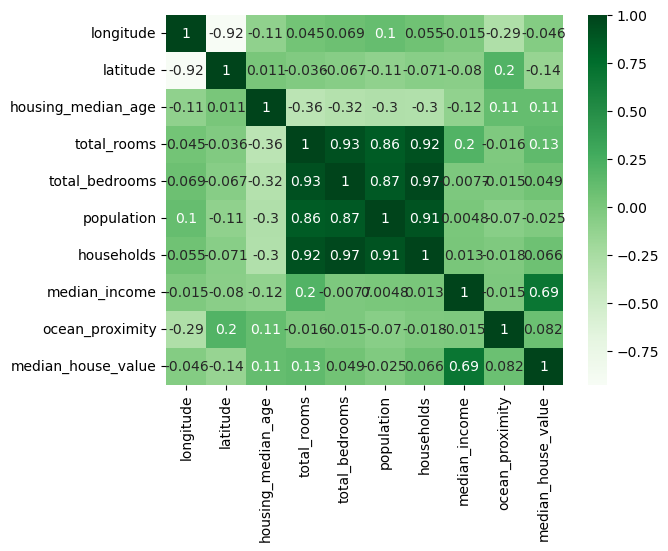

In [9]:
matrix = df_encoded.corr()
sns.heatmap(matrix, cmap="Greens", annot=True, xticklabels=True, yticklabels=True)

In [10]:
inputs = df_encoded.drop('median_house_value', axis=1)
targets = df_encoded['median_house_value']

In [11]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)

In [12]:
scaled_inputs_train = preprocessing.scale(inputs_train)
scaled_inputs_test = preprocessing.scale(inputs_test)

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(scaled_inputs_train, targets_train)

LinearRegression()

In [14]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(targets_train, reg.predict(scaled_inputs_train))
r2 = r2_score(targets_train, reg.predict(scaled_inputs_train))

In [15]:
print("Train dataset score:")
print("Mean Squared Error: \t{:.2f}".format(mse))
print("R-squared: \t\t{:.2f}".format(r2*100))

Train dataset score:
Mean Squared Error: 	4845283206.69
R-squared: 		63.74


In [17]:
mse_test = mean_squared_error(targets_test, reg.predict(scaled_inputs_test))
r2_test = r2_score(targets_test, reg.predict(scaled_inputs_test))

In [18]:
print("Test dataset score:")
print("Mean Squared Error: \t{:.2f}".format(mse_test))
print("R-squared: \t\t{:.2f}".format(r2_test*100))

Test dataset score:
Mean Squared Error: 	4892036384.70
R-squared: 		62.70


In [19]:

print("Y-intercept: \t\t{:.2f}".format(reg.intercept_))
coef = reg.coef_
print("Slope:\t")
for i in coef:
    print("\t{:.2f}".format(i))

Y-intercept: 		207735.06
Slope:	
	-85719.62
	-90753.20
	14624.24
	-15959.37
	37190.05
	-43836.23
	27376.37
	76258.39
	609.71


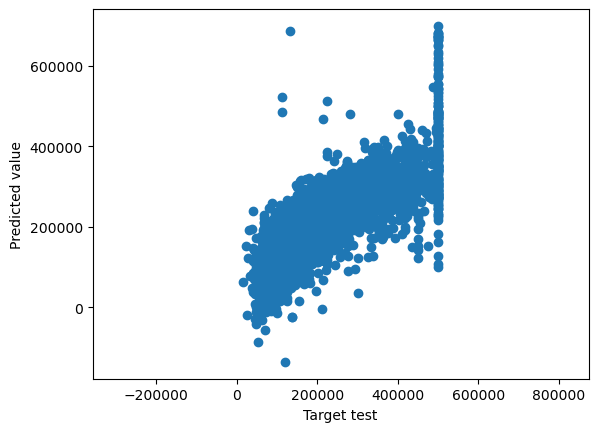

In [20]:
plt.scatter(targets_test, reg.predict(scaled_inputs_test))
plt.xlabel('Target test')
plt.ylabel('Predicted value')
plt.axis('equal')
plt.show()

In [17]:
df_median_income = df_encoded['median_income']

In [18]:
inputs_train_m, inputs_test_m, targets_train_m, targets_test_m = train_test_split(df_median_income, targets, test_size=0.2, random_state=1)

In [19]:
scaled_inputs_train_m = preprocessing.scale(inputs_train_m)
scaled_inputs_test_m = preprocessing.scale(inputs_test_m)

In [20]:
scaled_inputs_train_m, scaled_inputs_test_m = pd.DataFrame(scaled_inputs_train_m), pd.DataFrame(scaled_inputs_test_m)

In [21]:
reg_m = LinearRegression()
reg_m.fit(scaled_inputs_train_m, targets_train_m)

LinearRegression()

In [22]:
pred_m = reg_m.predict(scaled_inputs_test_m)
pred_m

array([183084.93548747, 130734.7242597 , 214504.94272955, ...,
       257106.38860757, 249984.19094919, 160664.42193396])

In [23]:
mse_m = mean_squared_error(targets_test_m, pred_m)
r2_m = r2_score(targets_test_m, pred_m)

In [24]:
print("Mean Squared Error: \t{:.2f}".format(mse_m))
print("R-squared: \t\t{:.2f}".format(r2_m*100))
print("Y-intercept: \t\t{:.2f}".format(reg_m.intercept_))
coef = reg_m.coef_
print("Slope:\t")
for i in coef:
    print("\t{:.2f}".format(i))

Mean Squared Error: 	6930168671.40
R-squared: 		47.17
Y-intercept: 		207735.06
Slope:	
	79549.01


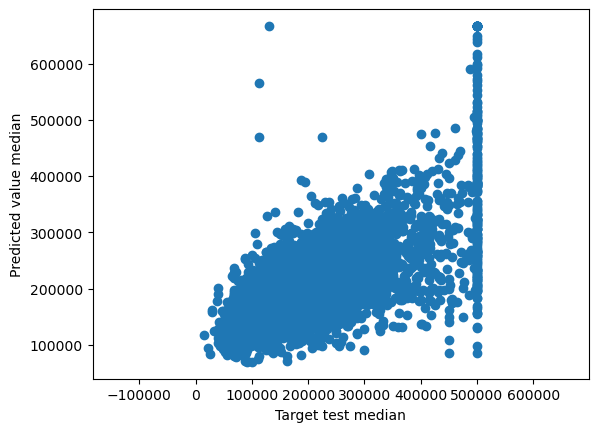

In [25]:
plt.scatter(targets_test_m, pred_m)
plt.xlabel('Target test median')
plt.ylabel('Predicted value median')
plt.axis('equal')
plt.show()

In [54]:
comparison_table = pd.DataFrame(columns=['Weights', 'Multiple independent variables', 'Median income'])
comparison_table['Weights'] = ['Mean Squared error', 'r2', 'Y-intercept', 'Slope1', 'Slope2', 'Slope3', 'Slope4', 'Slope5', 'Slope6', 'Slope7', 'Slope8', 'Slope9']
comparison_table['Multiple independent variables'] = [mse, r2, reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4], reg.coef_[5], reg.coef_[6], reg.coef_[7], reg.coef_[8],]
comparison_table['Median income'] = [mse_m, r2_m, reg_m.intercept_, reg_m.coef_[0], None, None, None, None, None, None, None, None]

In [55]:
comparison_table

,Weights,Multiple independent variables,Median income
0,Mean Squared error,4.892036e+09,6.930169e+09
1,r2,6.270435e-01,4.716614e-01
2,Y-intercept,2.077351e+05,2.077351e+05
3,Slope1,-8.571962e+04,7.954901e+04
4,Slope2,-9.075320e+04,NaN
5,Slope3,1.462424e+04,NaN
6,Slope4,-1.595937e+04,NaN
7,Slope5,3.719005e+04,NaN
8,Slope6,-4.383623e+04,NaN
9,Slope7,2.737637e+04,NaN
